## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [75]:
# read data into a DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [76]:
#df[['TV','radio']]


#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

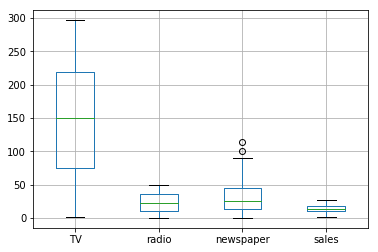

In [77]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

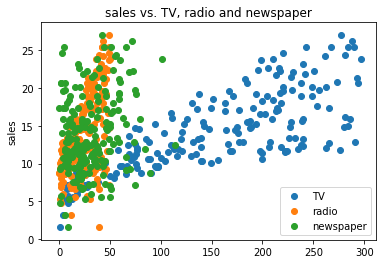

In [78]:
plt.scatter(df['TV'], df['sales'])
plt.scatter(df['radio'], df['sales'])
plt.scatter(df['newspaper'], df['sales'])
plt.legend(['TV','radio','newspaper'])
plt.ylabel('sales')
plt.title('sales vs. TV, radio and newspaper')
plt.show()
# I'll plot the scatter plot matrix and make explaination later

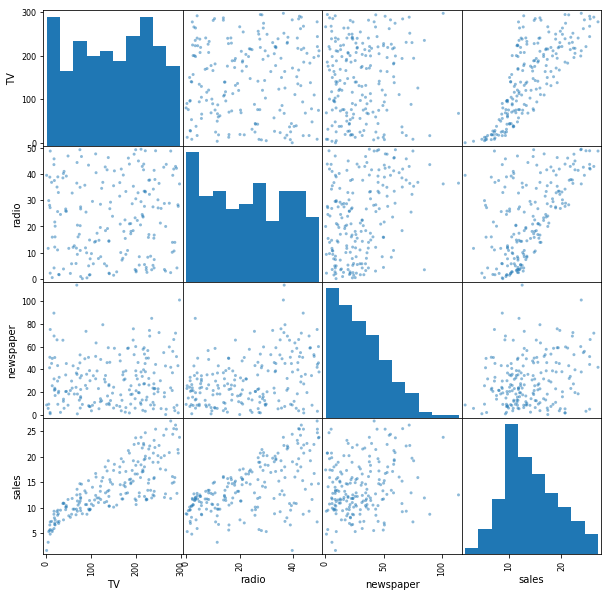

In [79]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Answer: 

It seems that the varaible "TV" is correlated with "sales", and the variable "radio" seems correlated with "sales" as well. It seems that there are no other correlations besides these two. The variable "newspaper" seems that have a weak correlation with "sales".  

In the scatterplots "TV against radio", "TV against newspaper", "radio against newspaper" and "newspaper against sales", we can find any obvious pattern which indicates there is a correlation between two variables.

In the scatterplot "TV against sales", it produces a clear lower-left-to-upper-right pattern, which indicates a positive correlation between TV and sales.

In the scatterplot "radio against sales", we can also see a lower-left-to-upper-right pattern, so radio seems correlated with sales as well.

The correlation table we produced below confirmed our thoughts.

In [80]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


The correlation beween "newspaper" and "sales" are not that strong.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [81]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [82]:
y=df[['sales']]
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


b) Set X to be just the features described above in df

In [83]:
X=df[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [84]:
np.random.seed(1)
df_r=df.sample(frac=1.0)
# shuffle the rows
y_r=df_r[['sales']]
X_r=df_r[['TV','radio','newspaper']]
size = len(df_r.index)

# Split the data into training/testing sets
X_train = X_r[0:int(size*0.8)]
X_test = X_r[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y_r[0:int(size*0.8)]
y_test = y_r[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [85]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

Coefficients: 
 [[  4.63412128e-02   1.84621854e-01   1.31469965e-04]]
Intercept: 
 [ 2.88057357]
Residual sum of squares: 2.32


In [86]:
# Make predictions on testing data
y_test_pred = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [87]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr.score(X_test, y_test))
# Good, since the variance score indicates that 92.51% of the variances are explained by known the given variables.

Variance score: 0.9251


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

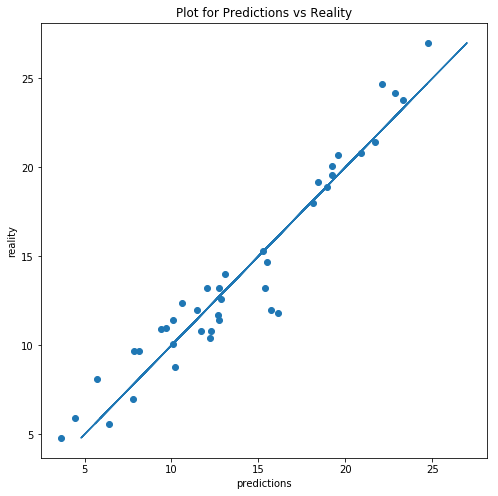

In [88]:
# Plot Predictions on Testing Data vs Reality
plt.figure(figsize=(8,8))
plt.title('Plot for Predictions vs Reality')
plt.xlabel('predictions')
plt.ylabel('reality')
plt.scatter(y_test_pred,y_test['sales'])
plt.plot(y_test,y_test)
plt.show()

Answer:

It looks like a good model as all the data points lie around the fitted line. It looks quite linear.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [89]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[  4.63412128e-02   1.84621854e-01   1.31469965e-04]]
Intercept: 
 [ 2.88057357]


Answer： 

No, we cannot measure the importance of features in this model just based on the coefficients we obtained above. Before making conclusions, we should firstly standardized the three variables.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Answer: From g), we can have the following interpretation:
If there is no advertisment on TV, radio or newspaper, the sales is 2.94 unit.
For each additional unit of TV, the sales increases 0.05 unit.
For each additional unit of radio, the sales increases 0.18 unit.
For each additional unit of newspaper, the sales almost doesn't change.
Therefore, the radio is the most important feature.

However, if we want to measure the importance of the features involved, we should standardized all variables.

In [90]:
# standardize variables
df2 = (df - df.mean()) / df.std()
# then repeat the all previous steps
df2_r=df2.sample(frac=1.0)
# shuffle the rows
y2_r=df2_r[['sales']]
X2_r=df2_r[['TV','radio','newspaper']]
size2 = len(df2_r.index)

# Split the data into training/testing sets
X2_train = X2_r[0:int(size2*0.8)]
X2_test = X2_r[int(size2*0.8):]

# Split the targets into training/testing sets
y2_train = y2_r[0:int(size2*0.8)]
y2_test = y2_r[int(size2*0.8):]

# Create linear regression object
regr2 = LinearRegression()

# Train the model using the training sets
regr2.fit(X2_train, y2_train)

# The coefficients
print('Coefficients: \n', regr2.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[ 0.75329261  0.53589321 -0.00336027]]
Intercept: 
 [ 2.88057357]


The coefficients obtained after standardization indicates that TV is the most important feature, and newspaper is the least important feature.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [91]:
# Create linear regression object
regr3 = LinearRegression()

# Train the model using the training sets of TV and radio
regr3.fit(X_train.iloc[:,0:2], y_train)

print('Variance score: %.4f' % regr3.score(X_test.iloc[:,0:2], y_test))

Variance score: 0.9251


In the given dataset, we have one dependent variable and three independent variables. From the after standardization coeffcients we obtained above, the coefficient of newspaper is the smallest and very close to 0; besides, we trained a new linear regression model with only "TV", "radio" and "sales", there is no big difference in Variance score. Therefore, we disregard this variable at this stage.

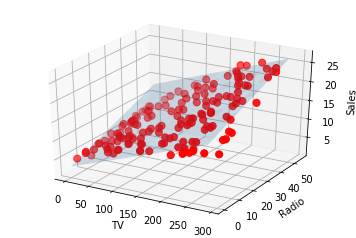

In [92]:
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
# Reference: https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6 

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(0, 300, 20), np.arange(0, 60, 5))

# best-fit linear plane
A = np.c_[X_train.iloc[:,0], X_train.iloc[:,1], np.ones(X_train.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, y_train)    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]
    

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], y_train, c='r', s=50)
plt.xlabel('TV')
plt.ylabel('Radio')
ax.set_zlabel('Sales')
#ax.axis('equal')
#ax.axis('tight')
plt.show()

The hyperplane plot suggests that we should consider adding the interaction term "TV*radio", since it seems that there is some non-linear interaction.

In [93]:
# Use the standardized data
X4_train = np.c_[X2_train.iloc[:,0:2], X2_train.iloc[:, 0] * X2_train.iloc[:, 1]]
X4_test = np.c_[X2_test.iloc[:,0:2], X2_test.iloc[:, 0] * X2_test.iloc[:, 1]]

# Create linear regression object
regr4 = LinearRegression()

# Train the model using the training sets
regr4.fit(X4_train, y2_train)

print('Variance score: %.4f' % regr4.score(X4_test, y2_test))

Variance score: 0.9765


The variance score increases with the addition of the interaction term "TV*radio". 

I'd like to conclude that after removing the variable "newspaper" and adding the interaction term "TV*radio", the performance is improved.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


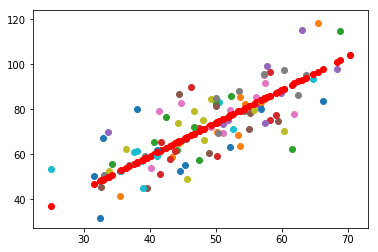

In [94]:
# the original code for the case learning rate = 0.0001
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/data.csv", delimiter=",")
    learning_rate = 0.0001 
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03786804177477676, m = 0.7050094848543003, error = 1603.9025064985485


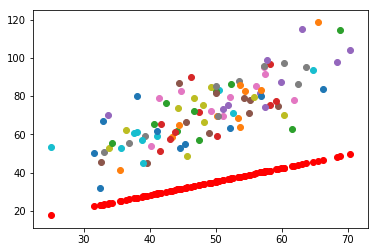

In [95]:
# modify the learning rate = 0.0004
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/data.csv", delimiter=",")
    learning_rate = 0.0004 # previously =0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


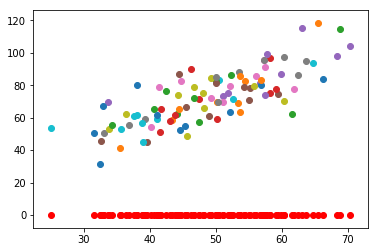

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05818804044294919, m = 2.948281189436421, error = 5494.876051554403


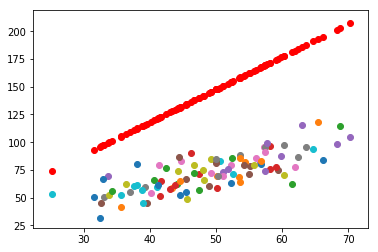

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0008551646958474546, m = 0.019040133005722826, error = 5425.548903532563


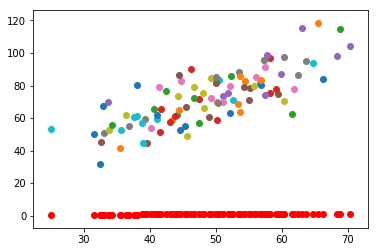

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.05829678234050579, m = 2.9293452426042537, error = 5357.114738058191


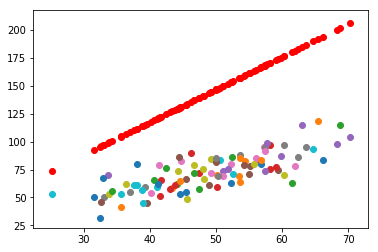

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0017054776406117411, m = 0.0378348940251243, error = 5289.562052862701


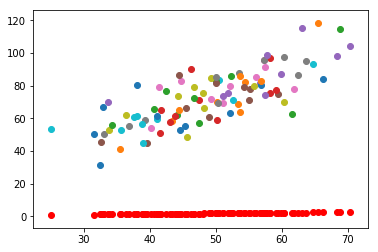

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.05841028677277326, m = 2.9106530834885644, error = 5222.879493835148


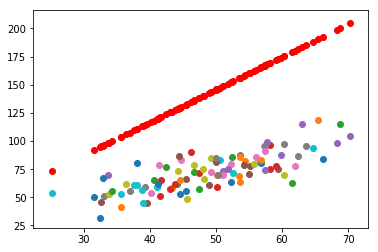

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0025510009562452057, m = 0.05638744363626502, error = 5157.055853113861


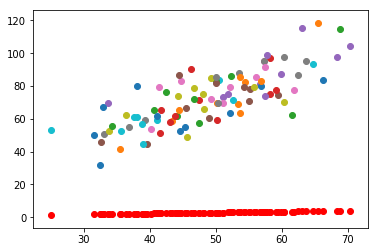

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.05852849202267843, m = 2.8922015719324805, error = 5092.080067202602


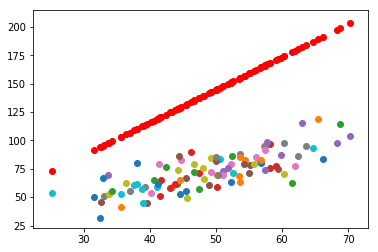

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.0033917959645461543, m = 0.0747009017066449, error = 5027.94121511106


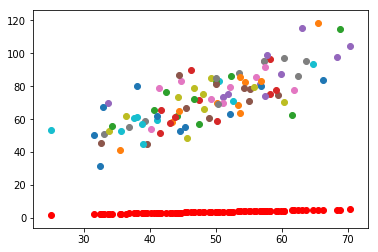

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.05865133716813143, m = 2.8739876082266385, error = 4964.628516519291


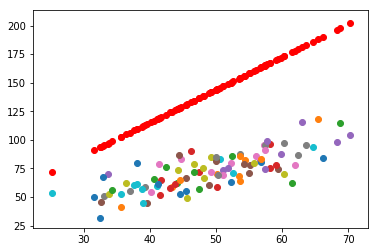

In [96]:
# Use this to visually discuss convergence rate based on learning rate
# for learning rate = 0.0004
for num in range(0,10):
    run(num)
    plt.show()

Explain:


When we set the learning rate as 0.0001 (the original given value), we will notice that as the number of iteration changes, the gradient descent will converge (get stable).

When I increase the learning rate to 0.0004, then we have the nine plots above, which show that the gradient descent overshoot the optimal point and oscillate back and forth. It seems that the gradient descent will take a long time to converge.

It's easy to explain in words. In class, we talked about the learning rate $\mathcal{k}$ is also known as time step size. If the step size is too large, the length of the steps will be also large, and then it can easily jump over the minimum-error (optimal) point we want to reach, and therefore cause an oscillation around the minimum back and forth, and cause the convergence to take longer (or even never converge).

It's also not difficult to understand in mathematical sense. Simply speaking, When the learning rate $\mathcal{k}$ is large, $\beta_n=\beta_{n-1}-\mathcal{k}\triangledown_\beta\mathcal{L}(\beta_{n-1})$ can be over-corrected as the large k can lead a large change $\mathcal{k}\triangledown_\beta\mathcal{L}(\beta_{n-1})$. 

More specifically, assume we have the true model $y=mx+b$, and start with $m_0$ and $b_0$, then our error at step 0 is $\sum_{i=1}^n(y_i-m_0x_i+b_0)^2$. In the next step, we have $m_1=m_0-k*m_{gradient}$ and $b_1=b_0-k*b_{gradient}$, then our error at step 1 is 
$$error_0=\sum_{i=1}^n(y_i-m_1x_i+b_1)^2=\sum_{i=1}^n(y_i-(m_0-k*m_{gradient})x_i+(b_0-k*b_{gradient}))^2=\sum_{i=1}^n(y_i-m_0x_i+b_0+k*(m_{gradient}x_i-b_{gradient}))^2$$
and similarly, for any $t>0$, we have
$$error_c=\sum_{i=1}^n(y_i-m_{c+1}x_i+b_{c+1})^2=\sum_{i=1}^n(y_i-m_cx_i+b_c+k*(m_{gradient}x_i-b_{gradient}))^2$$

With a large k, the influence caused by the difference $m_{gradient}x_i-b_{gradient}$ can be magnified, and then the sum of square error $\sum_{i=1}^n(y_i-m_cx_i+b_c+k*(m_{gradient}x_i-b_{gradient}))^2$ will decrease slowly or even increase compared to the previous step $\sum_{i=1}^n(y_i-m_{c+1}x_i+b_{c+1})^2$.



## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

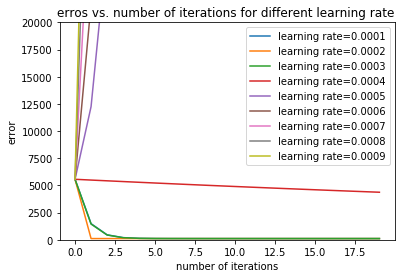

In [97]:
points = genfromtxt("https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/data.csv", delimiter=",")

def error_curve(learning_rate):
    nums = []
    errors =[]
    for num in range(0,20):
        #learning_rate = 0.0001
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num)
        nums.append(num)
        errors.append(compute_error_for_line_given_points(b, m, points))
    plt.plot(nums, errors)
plt.title('erros vs. number of iterations for different learning rate ')
plt.xlabel('number of iterations')
plt.ylabel('error')
plt.ylim(0, 20000)
for i in range(1,10):
    error_curve(i/10000)
plt.legend(['learning rate=0.0001','learning rate=0.0002','learning rate=0.0003','learning rate=0.0004','learning rate=0.0005','learning rate=0.0006','learning rate=0.0007','learning rate=0.0008','learning rate=0.0009'])
plt.show()

Note that in the errors against number of iterations plot, the curve of learning rate=0.0001 is superimposed by the curve of learning rate=0.0003.


From this plot, we can see that:

1) When learning rate is 0.0002, the error decreases most rapidly (among these nine learning rates), which implies that the gradient descent converges most rapidly.

2) When learning rate is 0.0001 or 0.0003, we can see that the gradient descent also converges very quickly.

3) When learning rate is 0.0004, the gradient descent does converge but takes much longer time compared to the above three.

4) Wehn learning rate is 0.0005 or larger, the error keeps increasing and the gradient descent doesn't converge at all (it diverges).